In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
from scipy.special import erf
from functions import *



%matplotlib inline

[1.55669291 1.55669291]
[-0.102 -0.096]


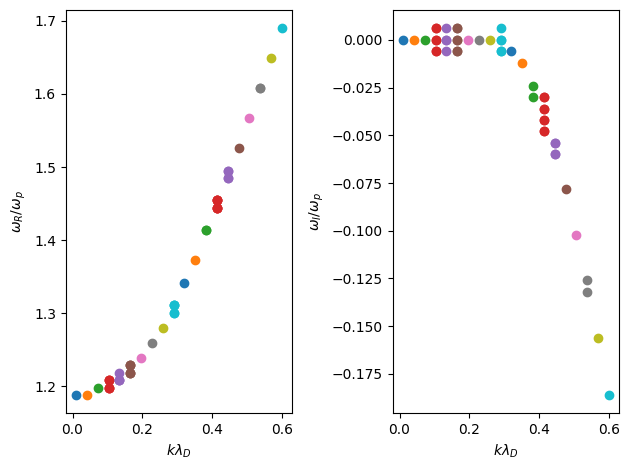

In [46]:
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel(r'$k\lambda_D$')
ax1.set_ylabel(r'$\omega_R/\omega_p$')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel(r'$k\lambda_D$')
ax2.set_ylabel(r'$\omega_I/\omega_p$')

k0s = np.linspace(0.01,0.6,20)

Ti = 1 #ion temperature as a fraction of electron temperature
mratio = 8*10**3 #ion mass as a fraction of electron mass
vthi = Ti*1./np.sqrt(mratio)

WR, WI = find_w_roots(0.5, 0.01, 8000 )
print(WR)
print(WI)

for k0 in k0s:
    Wrs, Wis = find_w_roots(k0, vthi, mratio)
    ax1.scatter(k0*np.ones(len(Wrs)), Wrs)
    ax2.scatter(k0*np.ones(len(Wis)), Wis)

plt.tight_layout()

In [41]:
#THIS CELL IS FOR FINDING ERRORS

print(D_IAW_analytic(0.4, 0.3, 0.6, 0.01, 8000))

Wr = np.linspace(0.4,1.7,128)
Wi = np.linspace(-0.3,0.3,101)

#print(Wr)
#print(Wi)

D_arr = np.zeros((len(Wi), len(Wr)), dtype = complex)
for i in range(len(Wi)):
    for j in range(len(Wr)):
        D_arr[i,j] = D_IAW_analytic(Wr[j], Wi[i], k0=0.6, vthi = 0.01, mratio = 8000)

#print(D_arr)

(2.568382625441253+1.3120395154843458j)


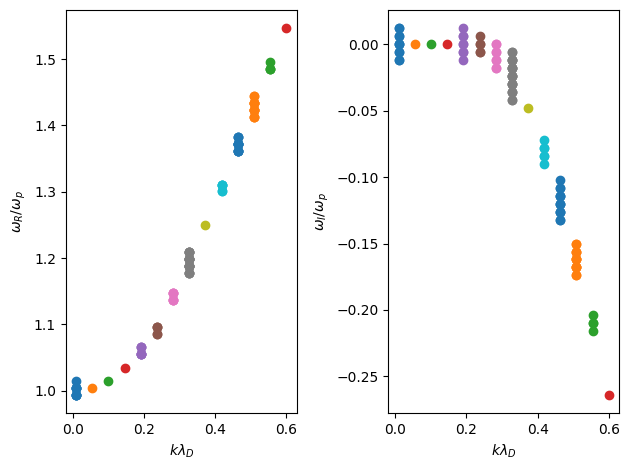

In [2]:
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel(r'$k\lambda_D$')
ax1.set_ylabel(r'$\omega_R/\omega_p$')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel(r'$k\lambda_D$')
ax2.set_ylabel(r'$\omega_I/\omega_p$')

k0s = np.linspace(0.01,.6,14)

mi_over_me = 1836 #ion mass as a fraction of electron mass
Ti_over_Te = .01 #Ti*1./np.sqrt(mratio)

for k0 in k0s:
    Wrs, Wis = find_w_roots_plasmapy(k0, Ti_over_Te)
    ax1.scatter(k0*np.ones(len(Wrs)), Wrs)
    ax2.scatter(k0*np.ones(len(Wis)), Wis)

plt.tight_layout()

#ax1.plot(k0s,k0s*np.sqrt(1/mi_over_me))
#ax1.plot(k0s,np.sqrt(1+3*k0s**2))

/home/david/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/david/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


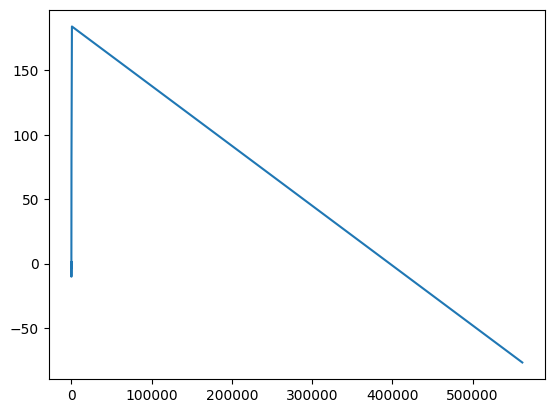

In [6]:
wrs = np.linspace(.5,1.5,50)
wis = np.linspace(-.5,.5,50)
sols = np.zeros((len(wrs),len(wis)),dtype = 'complex')
k_const = 0.1
for i in range(len(wrs)):
    for j in range(len(wis)):
        sols[i,j] = ion_stuff(wrs[i],wis[j],k = k_const, mi_over_me=mi_over_me,ti_over_te=Ti_over_Te)

plt.plot(sols[0],sols[1])